# Create Audio Dataset

The porpuse of this notebook is to create an audio dataset for training a spectrogram classifier. This script takes every speakers  audio files fromSingleWordProductionDutch-iBIDS then splits them into words. After that it creates seperate folders for every word and saves the corresponding samples into them them.

For splitting the audio into words I will use the following repo:
https://github.com/tyiannak/pyAudioAnalysis

The audio to spectrogram conversion will be the part of the sprectrogram model training script.

# Installs and imports

In [ ]:
#if the pyAuidoAnalysis submodule is not mounted yet
git submodule add https://github.com/tyiannak/pyAudioAnalysis.git

In [2]:
!git submodule init
!git submodule update

In [16]:
!pip install pynwb pandas

     -------------------------------------- 126.6/126.6 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 187.5/187.5 kB 5.7 MB/s eta 0:00:00


In [31]:
!pip install scipy

In [2]:
import zipfile
import requests
import os
import shutil
from typing import List,Tuple

from pynwb import NWBHDF5IO
import pandas as pd
import numpy as np
import scipy
import scipy.signal
import scipy.io.wavfile
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

## Download and unzip the original dataset

Use the bellow code snippet to download and unzip the original dataset. This operation can also be done by hand.

In [3]:
def create_directory(dir_path: str):
    """Creates a directory if it is none existent."""
    isExist = os.path.exists(dir_path)
    if not isExist:
        os.makedirs(dir_path)
        print("The new directory is created!")
        return
    print("Directory already created.")

In [4]:
data_root_dir = "data"
create_directory(data_root_dir)

Directory already created.


In [3]:
r = requests.get("https://osf.io/download/g6q5m")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("data")

KeyboardInterrupt: 

## Getting the audio and the corresponding worlds from the nwb 

Gets the full length audios and the corresponding words from the NWB file and saves them into "data/uncut_audios_dir"

In [5]:
uncut_audios_dir = "data/uncut_audios_dir"
create_directory(uncut_audios_dir)

The new directory is created!


In [7]:
def create_words_histogram(words_list,title):
    """Helper for figuring out the frequency of the words."""
    
    word_list = words_list

    counts = Counter(word_list)

    labels, values = zip(*counts.items())

    # sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange your data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]

    indexes = np.arange(len(labels))

    bar_width = 0.35

    plt.bar(indexes, values)

    # add labels
    plt.title(title)
    plt.xticks(indexes + bar_width, labels)
    plt.show()

Directory already created.


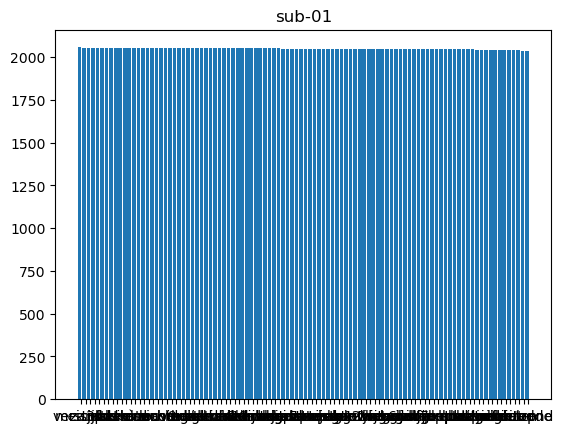

['helft', 'hierop', 'stiekem', 'en', 'zevenduizend', 'braadde', 'vloog', 'werd', 'wegpakte', 'wak', 'zich', '9', '10', 'tuwiet', 'bakker', 'hem', 'kin', 'stilstaan', 'bevrijd', 'aan', 'wel', 'was', 'hoe', '8', 'groen', 'maantje', 'vogelkooitje', '6', 'teruggekregen', 'wanneer', 'juist', 'zanddak', 'lij', 'of', 'over', 'dat', 'betovering', 'gefluit', '3', 'zei', 'bak', '5', 'niet', 'nachtegalen', 'te', 'komt', 'van', 'dauwdruppel', 'met', 'sterkste', 'totdat', 'helemaal', 'mooie', 'sprong', 'ze', 'smeekte', 'pak', 'boomstammen', 'dan', 'er', 'onmiddellijk', 'vogeltje', 'dit', 'door', 'mooi', 'een', 'zijn', 'nog', 'op', 'verstijfde', 'al', 'het', 'haar', 'redetwisten', 'om', 'kasteel', 'vak', '7', 'donkere', 'struik', 'naar', 'maar', 'ook', 'verdwaald', '12', 'dakker', 'je', 'direct', '2', 'spreuk', 'binnenplaats', 'hij', 'onschuldig', 'als', '`s', 'tussen', 'zo', 'meisjes', 'veel', 'schold']
Done
The new directory is created!


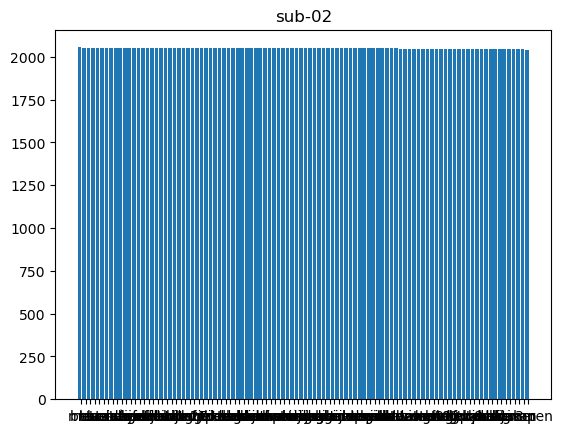

['ook', 'als', 'noordenwind', 'vak', 'over', 'onmiddellijk', 'onschuldig', 'verstijfde', 'ze', 'groen', 'dakker', 'erheen', 'dan', 'terugvinden', 'bak', 'schold', '3', '9', '11', 'wel', 'of', 'haar', 'wanneer', 'hierop', 'met', 'zanddak', 'kin', 'sprong', 'gefluit', 'zonlicht', 'tak', 'bij', 'uittrekken', 'verdwaald', 'nachtegalen', 'vlakbij', 'binnenplaats', 'alsof', 'hij', 'te', 'wegpakte', 'tussen', 'een', 'maar', 'totdat', 'dauwdruppel', 'van', 'stiekem', '`s', 'naar', 'zo', 'teruggekregen', 'wat', 'betovering', 'boomstammen', 'in', 'tuwiet', '2', 'de', 'zei', 'donkere', 'uit', 'redetwisten', 'kwamen', 'sterkste', 'stilstaan', '8', 'doodsbang', 'er', 'niet', 'was', 'mij', 'al', 'die', 'helft', 'werd', 'mooie', '12', 'op', 'vogeltje', 'zijn', 'het', 'mijn', '10', 'direct', 'zich', 'moment', 'nog', 'waren', 'kasteel', 'aan', 'door', 'hem', '7', 'nu', 'zandbak', 'zou', 'verlost', 'braadde', 'spreuk']
Done
The new directory is created!


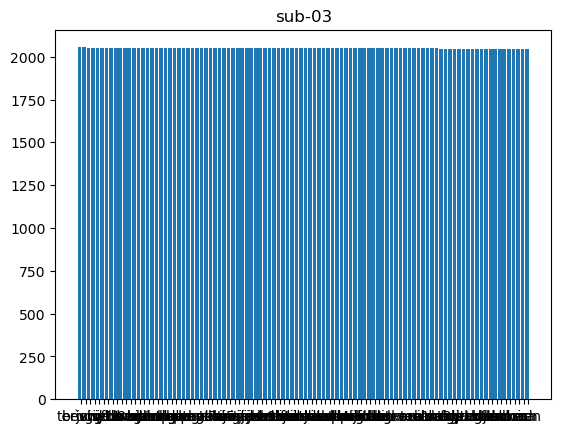

['buurt', 'meisjes', '7', 'vogeltje', 'betovering', 'haar', 'zandbak', 'wegpakte', 'struik', 'om', 'nog', 'hij', 'erheen', 'braadde', 'totdat', 'sprong', 'over', 'de', 'komt', 'zanddak', 'schold', 'spreuk', 'je', 'ze', 'zijn', 'tussen', 'hun', 'niet', '4', 'tot', 'vogelkooitje', 'uittrekken', 'donkere', 'of', 'naar', '`s', 'hoe', 'verdwaald', 'geen', 'er', 'kwamen', 'bak', 'daarna', 'verlost', 'nu', 'hierop', 'wat', 'bij', 'bloedrode', 'juist', 'hem', 'werd', '9', 'stilstaan', 'door', 'deur', 'dichtbij', 'zich', 'nachtegalen', 'vloog', 'mooie', 'teruggekregen', '11', 'van', 'zonlicht', 'zo', 'verstijfde', 'op', 'en', 'wak', 'veel', 'helft', 'dan', 'wel', 'zou', '8', 'had', 'smeekte', 'aan', 'ook', 'bevrijd', 'met', 'groen', '5', 'in', 'mooi', 'dauwdruppel', 'maantje', 'kin', 'het', 'maar', 'te', '1', 'alsof', 'helemaal', 'onmiddellijk', 'bakker', '2', 'vak', 'dak']
Done
The new directory is created!


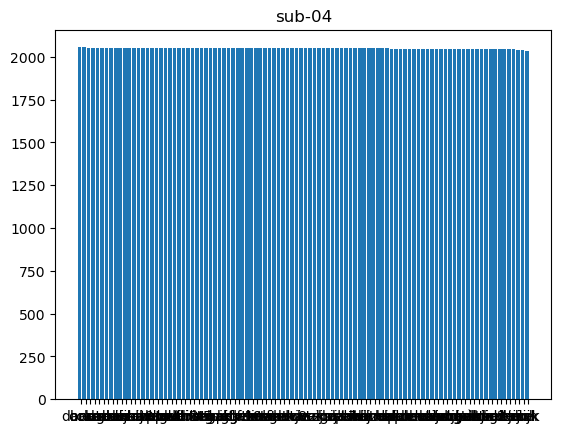

['vogeltje', 'wel', 'mooi', 'daarna', 'kasteel', 'dit', 'dan', 'helemaal', 'wegpakte', 'of', 'zou', '9', 'teruggekregen', 'bij', 'redetwisten', 'dakker', 'zijn', 'was', 'naar', 'bloedrode', 'direct', '7', 'stilstaan', 'aan', 'veel', 'komt', 'zei', '10', 'over', 'ook', 'ze', 'werd', 'nachtegalen', 'in', 'betovering', '2', 'braadde', 'zich', 'juist', 'en', 'groen', 'zandbak', '`s', 'sok', 'had', 'bakker', '4', 'smeekte', 'mij', 'mijn', 'vogelkooitje', 'geen', 'hierop', 'dat', 'voor', 'spreuk', 'deur', 'helft', 'donkere', 'het', 'uit', 'tussen', 'zevenduizend', 'de', 'tuwiet', '8', 'tak', 'gefluit', 'kwamen', 'lij', 'met', 'bevrijd', 'erheen', 'vlakbij', 'maar', 'struik', 'als', 'er', 'dauwdruppel', 'tot', 'zanddak', 'nu', 'bak', 'om', 'zo', 'pak', 'onmiddellijk', 'vak', 'alsof', 'verdwaald', 'maantje', 'al', 'mooie', '5', '3', 'je', 'haar', 'dak', 'door', 'onschuldig']
Done
The new directory is created!


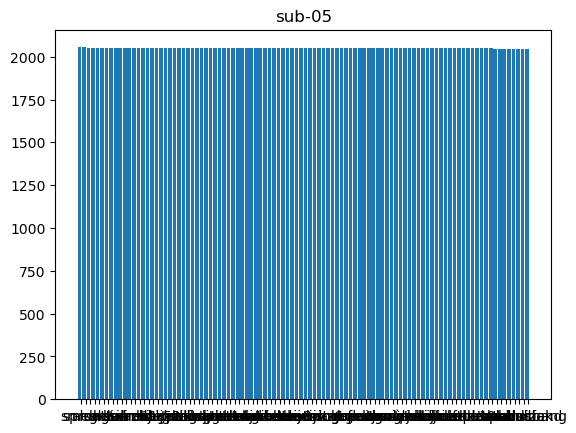

['verlost', 'terugvinden', 'er', 'hem', 'tot', 'wat', 'dakker', 'teruggekregen', 'niet', 'stiekem', 'tussen', 'veel', 'dak', 'waren', 'naar', 'deur', '8', 'in', 'vak', 'dat', 'de', 'al', 'doodsbang', 'zandbak', 'sprong', 'als', 'het', 'lij', 'kasteel', 'hun', 'direct', 'helemaal', 'betovering', 'zevenduizend', 'te', 'zijn', 'erheen', 'alsof', 'zou', 'of', 'nachtegalen', '5', 'met', 'bevrijd', '1', 'totdat', 'moment', 'zonlicht', 'maar', 'zo', 'smeekte', 'daarna', 'sok', 'ook', '2', 'wegpakte', 'bij', 'kin', 'bakker', '10', 'mij', '11', 'verstijfde', 'had', 'hij', 'groen', 'je', 'wel', 'struik', 'zanddak', 'en', 'tuwiet', 'schold', 'zei', 'dan', 'was', 'haar', 'kwamen', 'een', 'op', 'pak', 'tak', '6', 'ze', 'komt', 'binnenplaats', 'juist', 'hoe', 'helft', 'hierop', 'vogeltje', 'nog', 'vloog', 'boomstammen', 'wanneer', '`s', 'spreuk', 'mooie', 'gefluit', 'braadde']
Done
The new directory is created!


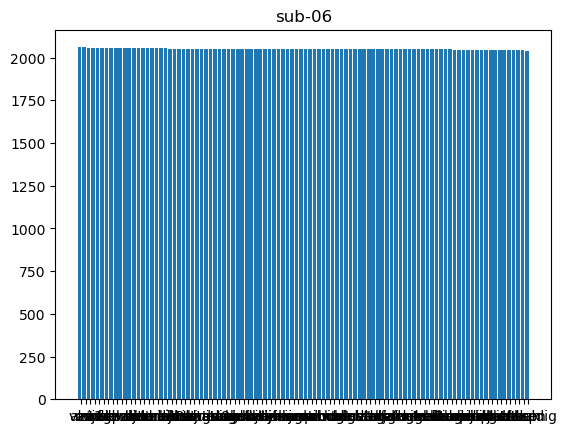

['hoe', 'zevenduizend', 'en', 'het', 'smeekte', 'in', 'verlost', 'maar', 'met', 'juist', 'uittrekken', 'de', '`s', 'ze', 'boomstammen', 'vogeltje', 'over', 'of', 'donkere', 'zonlicht', 'vloog', 'zijn', 'kwamen', 'alsof', 'door', 'sprong', 'naar', 'een', 'als', '3', 'waren', 'hierop', 'zei', 'tussen', 'wat', 'erheen', 'bakker', 'nu', 'daarna', 'moment', 'aan', '1', 'mijn', 'kin', 'wak', 'tuwiet', 'dat', 'sterkste', 'onschuldig', 'schold', 'verstijfde', 'bevrijd', 'al', 'verdwaald', 'ook', 'bloedrode', 'helemaal', '8', 'kasteel', 'op', 'bij', 'er', 'groen', 'sok', 'had', 'direct', 'vlakbij', '12', 'buurt', 'helft', 'veel', 'dit', 'gefluit', 'binnenplaats', 'zanddak', 'wegpakte', 'nog', 'dakker', 'nachtegalen', 'tot', 'dak', 'dichtbij', 'van', 'meisjes', 'zandbak', 'bak', 'teruggekregen', 'stilstaan', 'struik', 'totdat', 'terugvinden', 'om', 'te', 'lij', 'dan', 'betovering', 'mooie', 'zou', 'wel', '11']
Done
The new directory is created!


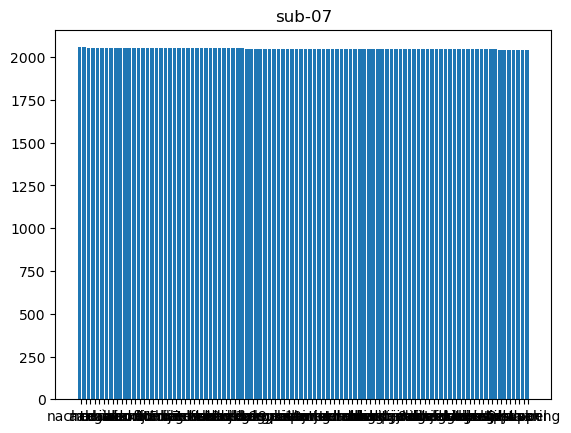

['zanddak', 'als', 'terugvinden', 'wegpakte', 'onmiddellijk', 'braadde', 'direct', 'ook', 'te', 'veel', 'meisjes', 'onschuldig', 'dauwdruppel', 'er', 'vak', 'gefluit', 'teruggekregen', 'doodsbang', 'met', 'niet', 'helft', 'zich', 'verlost', 'vogeltje', '5', 'zo', 'aan', 'maantje', 'wat', 'zei', 'werd', '7', 'hoe', 'dat', 'stilstaan', 'sterkste', 'mij', 'in', 'totdat', 'tak', 'bak', 'en', 'geen', 'nachtegalen', 'dichtbij', 'uit', 'pak', '11', 'bakker', 'wak', '12', 'bloedrode', 'zou', '6', 'nog', 'schold', 'spreuk', 'betovering', 'vloog', 'die', 'mooi', 'dit', 'wel', 'kin', 'dak', 'lij', 'waren', 'juist', 'sok', 'naar', 'maar', 'groen', '10', 'dakker', 'mooie', 'hun', '2', 'hem', 'alsof', 'had', 'smeekte', 'hierop', 'van', '1', 'noordenwind', 'wanneer', '`s', 'mijn', 'sprong', '8', 'een', 'de', 'uittrekken', 'vlakbij', 'deur', 'erheen', 'bevrijd', '9', 'dan', 'donkere']
Done
The new directory is created!


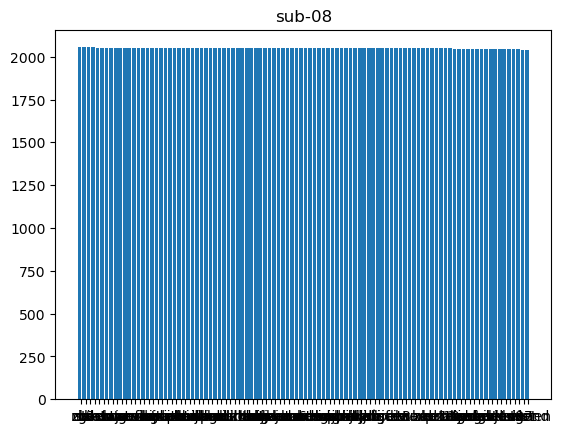

['de', 'buurt', 'verstijfde', 'zonlicht', 'zevenduizend', 'dit', 'stiekem', 'naar', 'onmiddellijk', 'wak', 'wanneer', 'als', 'braadde', 'bak', 'daarna', 'lij', 'waren', 'helemaal', 'moment', 'zich', 'die', 'dakker', '2', 'direct', 'zei', '7', 'verlost', 'je', 'vloog', 'dichtbij', '3', 'zo', 'er', 'betovering', 'geen', 'nog', 'sterkste', 'terugvinden', 'over', 'kwamen', 'dan', 'struik', 'uittrekken', 'voor', 'bakker', 'tuwiet', 'maar', 'bevrijd', 'meisjes', 'zanddak', 'van', 'aan', '10', 'kin', 'mooi', 'zou', 'bij', 'vogeltje', 'pak', 'alsof', 'bloedrode', '11', 'redetwisten', 'mijn', 'dauwdruppel', 'wel', 'hun', 'in', 'noordenwind', 'veel', 'was', 'mij', 'stilstaan', 'doodsbang', 'wat', 'werd', 'nu', 'door', 'nachtegalen', 'een', 'al', 'boomstammen', 'donkere', 'mooie', 'vlakbij', 'het', 'onschuldig', 'erheen', 'vogelkooitje', 'sprong', 'komt', 'maantje', 'had', '6', 'hoe', '`s', '8', 'met', 'gefluit', 'op']
Done
The new directory is created!


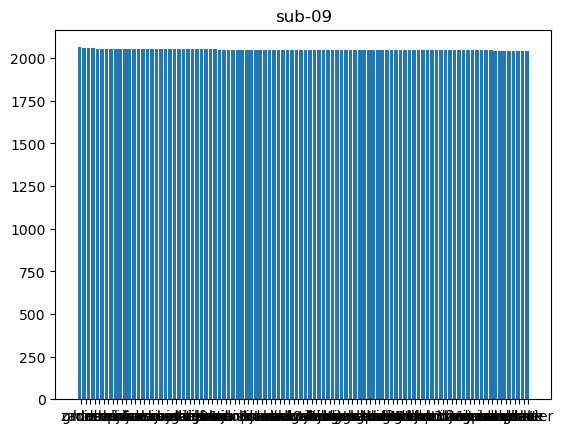

['tak', 'veel', 'helemaal', 'van', 'buurt', '6', 'dichtbij', 'over', 'te', 'stilstaan', 'aan', 'en', 'alsof', 'sok', 'braadde', '9', 'in', 'lij', 'was', 'stiekem', 'hij', 'juist', 'hoe', 'schold', 'op', 'maar', '5', 'tot', '8', 'zanddak', 'geen', 'dak', 'zei', 'dakker', 'zonlicht', 'vogeltje', 'verdwaald', 'voor', 'zich', 'vloog', 'spreuk', 'noordenwind', 'dan', 'teruggekregen', 'uittrekken', 'wegpakte', 'bloedrode', 'je', 'onschuldig', 'struik', 'binnenplaats', '1', 'kin', 'hierop', 'tuwiet', 'smeekte', 'tussen', 'nu', 'vogelkooitje', 'verstijfde', 'zandbak', 'vak', 'zevenduizend', 'om', 'een', 'naar', '3', '12', 'komt', 'mijn', 'kasteel', 'hem', 'door', 'wat', 'de', 'sterkste', 'die', 'sprong', 'zijn', 'maantje', 'of', 'totdat', 'nachtegalen', 'moment', 'als', '10', 'kwamen', '11', 'groen', 'werd', 'mooi', '4', 'mij', 'uit', 'wanneer', 'met', 'wel', 'had', 'deur', 'waren']
Done
The new directory is created!


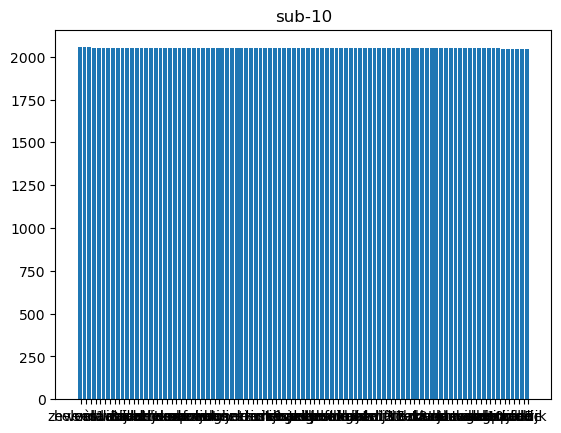

['5', 'naar', 'braadde', 'zo', 'onmiddellijk', 'verstijfde', 'door', '10', '12', 'hem', 'tuwiet', 'nachtegalen', 'zijn', 'wat', 'vak', 'dauwdruppel', 'tussen', 'zei', 'ze', 'dan', 'deur', 'bij', 'erheen', 'in', 'helemaal', '`s', 'lij', 'zonlicht', 'of', 'mijn', 'een', 'donkere', 'hij', 'de', '7', 'van', 'direct', 'met', 'bak', 'het', 'smeekte', 'was', 'kin', 'schold', 'al', '2', 'daarna', 'uit', 'doodsbang', 'om', 'er', 'verdwaald', 'struik', 'spreuk', 'vlakbij', 'zich', 'verlost', 'mij', 'meisjes', 'sterkste', 'sok', '3', 'uittrekken', '4', 'dit', 'zou', 'noordenwind', 'mooi', 'nu', 'voor', 'dakker', 'vogeltje', 'kasteel', '11', 'je', 'haar', 'bloedrode', 'te', '1', '9', 'hun', 'bakker', 'alsof', 'geen', 'stiekem', 'dat', 'had', 'helft', 'ook', 'moment', 'groen', 'veel', 'die', 'nog', 'zevenduizend']
Done


In [8]:
path_bids = os.path.join(data_root_dir,"SingleWordProductionDutch-iBIDS")
participants = pd.read_csv(os.path.join(path_bids,'participants.tsv'), delimiter='\t')
for p_id, participant in enumerate(participants['participant_id']):
    io = NWBHDF5IO(os.path.join(path_bids,participant,'ieeg',f'{participant}_task-wordProduction_ieeg.nwb'), 'r')
    nwbfile = io.read()
    #audio
    audio = nwbfile.acquisition['Audio'].data[:]
    audio_sr = 48000
    target_SR = 16000
    audio = scipy.signal.decimate(audio,int(audio_sr / target_SR))
    audio_sr = target_SR
    scaled = np.int16(audio/np.max(np.abs(audio)) * 32767)
    participant_dir = os.path.join(uncut_audios_dir,participant)
    create_directory(participant_dir)
    scipy.io.wavfile.write(os.path.join(participant_dir,'audio.wav'),audio_sr,scaled)
    
    #words (markers)
    words = nwbfile.acquisition['Stimulus'].data[:]
    words_list = [str(word) for word in words if word!=""]
    #It can be see
    create_words_histogram(words_list,participant)
    # From the histogram it can be seen that each word appears the same number of times(once) per
    # subjet, so i will save ony one version of them.
    
    #Removing duplicates while maintaining order
    words_list = list(dict.fromkeys(words_list))
    print(words_list)
    with open(os.path.join(participant_dir,"words.txt"),"w") as fp:
        for word in words_list:
            fp.write("%s\n" % word)
        print('Done')
    io.close()

### Seperating words into different directories

In [12]:
def cleaning_dir(dir_path):
    """Deletes the content of the given directory."""
    for path in os.listdir(dir_path):
        if path == ".ipynb_checkpoints":
            continue
        full_path = os.path.join(dir_path,path)
        os.remove(full_path)

In [11]:
# Creating a tmp folder where temporary versions of the audio files can be stored
tmp_dir = "data/tmp"
def splitting_audio_to_words(subject_idx: str):
    create_directory(tmp_dir)

    #Clearing tmp_dir
    cleaning_dir(tmp_dir)

    # Copying content of the  uncut_audios_dir (one subject at a time)
    shutil.copy2(f"data/uncut_audios_dir/sub-{subject_idx}/audio.wav",tmp_dir)
    shutil.copy2(f"data/uncut_audios_dir/sub-{subject_idx}/words.txt",tmp_dir)
    
    # I made manual calibrations of the silence removal algorithm (changin smoothing and weight) 
    # so the number of words will match the number of .wav parts
    !python pyAudioAnalysis/pyAudioAnalysis/audioAnalysis.py silenceRemoval -i data/tmp/audio.wav --smoothing 0.85 --weight 0.3

    #getting words
    words = []
    with open('data/tmp/words.txt','r') as file:
        # reading each line    
        for line in file:
            # reading each word        
            for word in line.split():
                words.append(word)            
    print(len(words))
    # getting the starting timestamp can be retreived from the name of the .wav file
    #list of tuples: one tuple contains the name of the wav file and the startig timestamp
    audios_w_timestamps: List[Tuple[str,float]] = []

    for path in os.listdir(tmp_dir):
        if path == ".ipynb_checkpoints" or path=="words.txt" or path=="audio.wav":
            continue
        full_path = os.path.join(tmp_dir,path)
        # cutting out the starting timestamp from the audio title
        modified_path = path.split("_")[1]
        modified_path_2 = modified_path.split("-")[0]
        audio_w_timestamp = [full_path,float(modified_path_2)]
        audios_w_timestamps.append(audio_w_timestamp)

    # ordering wav files based on starting timestamp
    timestamps = [ts for audio,ts in audios_w_timestamps]
    print(len(timestamps))
    # ordered timestamps:
    ordered_timestamps = sorted(timestamps)
    print(f"ordered timestamps:{ordered_timestamps}")
    
    words_dir = "data/words"
    create_directory(words_dir)
    for full_path,timestamp in audios_w_timestamps:
        for idx,ordered in enumerate(ordered_timestamps):
            if(ordered==timestamp):
                target_word = words[idx]
                target_word_dir = os.path.join(words_dir,target_word)
                create_directory(target_word_dir)
                shutil.copy2(full_path,target_word_dir)
                break

In [13]:
splitting_audio_to_words("02")

The new directory is created!
Figure(640x480)
100
100
ordered timestamps:[0.65, 3.35, 6.25, 9.5, 12.4, 15.45, 18.5, 21.6, 24.55, 27.6, 30.45, 33.55, 36.5, 39.6, 42.7, 45.7, 48.7, 51.45, 54.5, 57.55, 60.4, 63.45, 66.4, 69.55, 72.5, 75.85, 78.8, 81.55, 84.75, 87.6, 90.55, 93.4, 96.55, 99.75, 102.65, 105.75, 108.65, 111.55, 114.55, 117.55, 120.6, 123.8, 126.65, 129.5, 132.55, 135.85, 139.1, 141.85, 144.8, 147.65, 150.65, 153.65, 156.65, 159.6, 162.65, 165.6, 168.95, 171.75, 174.55, 176.35, 177.4, 180.7, 183.55, 186.85, 189.85, 192.9, 195.9, 198.7, 201.6, 204.7, 207.65, 210.6, 213.6, 216.6, 219.5, 222.55, 225.55, 228.55, 231.7, 234.65, 237.7, 240.75, 243.65, 249.8, 252.65, 255.85, 258.65, 261.6, 264.7, 267.9, 270.7, 273.55, 276.7, 279.85, 281.9, 285.9, 288.85, 291.35, 294.9, 297.9]
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
T

C:\Users\zsomb\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new directory is created!
The new di